# Module 12 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [1]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
browser = Browser('chrome')

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [3]:
# Visit the website
# https://static.bc-edx.com/data/web/mars_facts/temperature.html
url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"
browser.visit(url)

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [4]:
# Create a Beautiful Soup Object
html = browser.html
soup = BeautifulSoup(html, 'html.parser')

In [5]:
# Extract all rows of data
tables = soup.find_all("tr", class_="data-row")

### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [6]:
# Create an empty list
data_rows = []
# Loop through the scraped data to create a list of rows
for y in tables:
    td = y.find_all('td') #Find all td elements in the table row
    y = [z.text for z in td] #Extract text from each td element and store in Y
    data_rows.append(y) #Append Y to list

In [7]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names
mars_df = pd.DataFrame(data_rows, columns=['id', 'terrestrial_date', 'sol', 'ls', 'month', 'min_temp', 'pressure'])

In [8]:
# Confirm DataFrame was created successfully
mars_df.head()

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [9]:
# Examine data type of each column
mars_df.dtypes

id                  object
terrestrial_date    object
sol                 object
ls                  object
month               object
min_temp            object
pressure            object
dtype: object

In [10]:
# Change data types for data analysis
mars2_df = mars_df.astype({"id": int,
                           "terrestrial_date": "datetime64[ns]",
                           "sol": int,
                           "ls": int,
                           "month": int,
                           "min_temp": float,
                           "pressure": float})

In [11]:
# Confirm type changes were successful by examining data types again
mars2_df.dtypes

id                           int64
terrestrial_date    datetime64[ns]
sol                          int64
ls                           int64
month                        int64
min_temp                   float64
pressure                   float64
dtype: object

### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [12]:
# 1. How many months are there on Mars?
mars2_df["month"].value_counts().sort_index()

month
1     174
2     178
3     192
4     194
5     149
6     147
7     142
8     141
9     134
10    112
11    138
12    166
Name: count, dtype: int64

In [13]:
# 2. How many Martian days' worth of data are there?
len(mars2_df["sol"].unique()) #'sol' is one martian day. 

1867

There are 1,867 days of Martian data. 

In [14]:
# 3. What is the average low temperature by month?
avg_lowest_temp = mars2_df.groupby("month")["min_temp"].mean()
avg_lowest_temp

month
1    -77.160920
2    -79.932584
3    -83.307292
4    -82.747423
5    -79.308725
6    -75.299320
7    -72.281690
8    -68.382979
9    -69.171642
10   -71.982143
11   -71.985507
12   -74.451807
Name: min_temp, dtype: float64

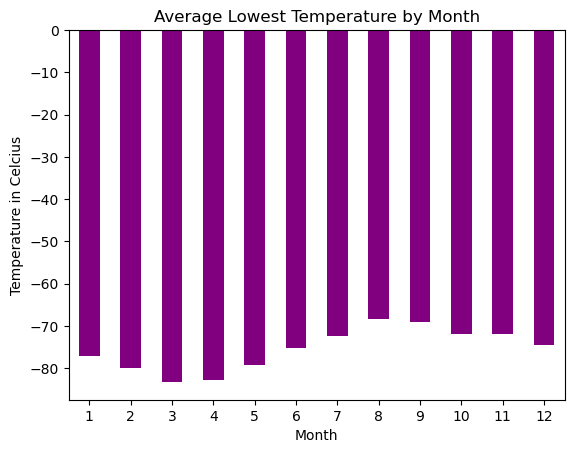

In [15]:
# Plot the average temperature by month
avg_lowest_temp.plot.bar(
    title ="Average Lowest Temperature by Month",
    xlabel="Month", ylabel="Temperature in Celcius",
    legend=False, color="purple", rot=0)
plt.show()

In [16]:
# Identify the coldest and hottest months in Curiosity's location
sorted_temp = avg_lowest_temp.sort_values()
sorted_temp

month
3    -83.307292
4    -82.747423
2    -79.932584
5    -79.308725
1    -77.160920
6    -75.299320
12   -74.451807
7    -72.281690
11   -71.985507
10   -71.982143
9    -69.171642
8    -68.382979
Name: min_temp, dtype: float64

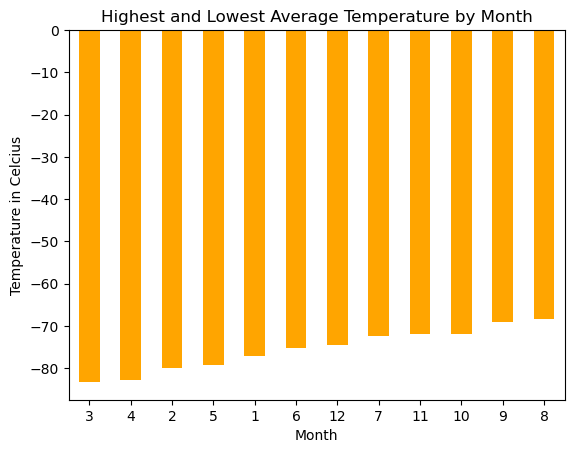

In [17]:
# Plot the coldest and hottest month in Curiosity's location
sorted_temp.plot.bar(
    title ="Highest and Lowest Average Temperature by Month",
    xlabel="Month", ylabel="Temperature in Celcius",
    legend=False, color="orange", rot=0)
plt.show()

The coldest month was Month 3 at -82.31 Celcius and the warmest month was Month 8 at -68.38 Celcius. 

In [18]:
# 4. Average pressure by Martian month
avg_pressure = mars2_df.groupby("month")["pressure"].mean()
avg_pressure

month
1     862.488506
2     889.455056
3     877.322917
4     806.329897
5     748.557047
6     745.054422
7     795.105634
8     873.829787
9     913.305970
10    887.312500
11    857.014493
12    842.156627
Name: pressure, dtype: float64

<Axes: title={'center': 'Average Pressure by Month'}, xlabel='Month', ylabel='Atmospheric Pressure'>

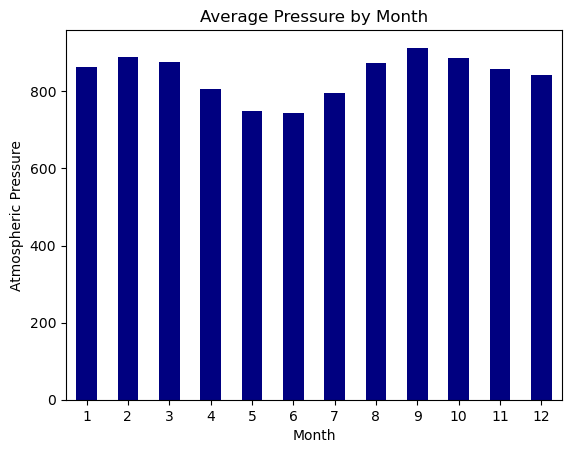

In [19]:
# Plot the average pressure by month
avg_pressure.plot.bar(
    title ="Average Pressure by Month",
    xlabel="Month", ylabel="Atmospheric Pressure",
    legend=False, color="navy", rot=0)

Atmospheric Pressure was highest in Month 9 at 913.31 and lowest in Month 6 at 745.05.

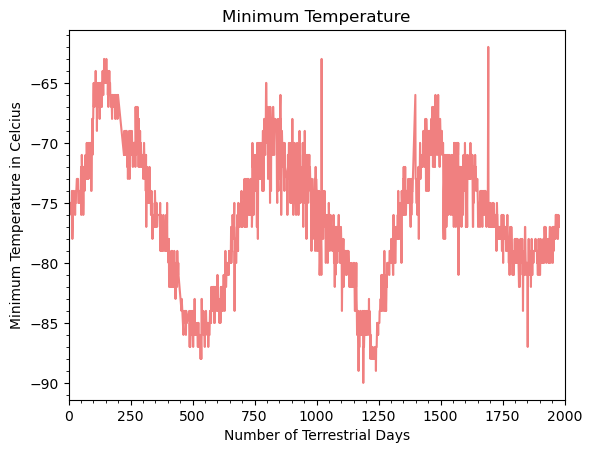

In [20]:
# 5. How many terrestrial (earth) days are there in a Martian year?
plt.plot(mars2_df['sol'], mars2_df['min_temp'], color = "lightcoral")
plt.title("Minimum Temperature")
plt.xlabel("Number of Terrestrial Days")
plt.ylabel("Minimum Temperature in Celcius")
plt.xlim(0, 2000)
plt.minorticks_on()
plt.show()

Answers: 
1) Google said that there are 24 months are Mars. The scraped data has 12 months of Mar's data.
2) There are 1,867 Martian days ('sol') of scraped data.
3) On average, the coldest month was Month 3 at -82.31 Celcius and the warmest month was Month 8 at -68.38 Celcius.
4) On average, atmospheric pressure was highest in Month 9 at 913.31 and lowest in Month 6 at 745.05.
5) Google said that there are 687 terrestrial (Earth days) in a Martian Year. The distances from peak to peak in the graph above is approximately 1425-750 or 675 terrestrial days, which is close to the number found on Google.



### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [22]:
# Write the data to a CSV
mars2_df.to_csv("mars_weather.csv", header=True, index = False, date_format = "%y,%m,%d")

In [23]:
browser.quit()